# Customer Churn Prediction - Exploratory Data Analysis

This notebook performs exploratory data analysis on the bank customer churn dataset to identify patterns and relationships between features and customer churn.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# Set up plotting
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Create directories for saving plots
os.makedirs('../docs/plots', exist_ok=True)

## 1. Load the Cleaned Data

In [2]:
# Load the cleaned data
df_cleaned = pd.read_csv('../data/cleaned/churn_cleaned.csv')

# Display basic information
print(f"Dataset shape: {df_cleaned.shape}")
print(f"\nColumns | Data types:\n{df_cleaned.dtypes}")
print(f"\nSample data:")
df_cleaned.head()

Dataset shape: (10000, 11)

Columns | Data types:
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts      float64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Sample data:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1.0,1,1,79084.10,0


## 2. Basic Statistical Analysis

In [3]:
# Summary statistics
print("Summary statistics for numerical features:")
df_cleaned.describe()

Summary statistics for numerical features:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.561300,38.660800,5.012800,76485.889288,1.527200,0.70550,0.515100,100090.239881,0.203700
std,96.558702,9.746704,2.892174,62397.405202,0.570081,0.45584,0.499797,57510.492818,0.402769
min,383.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,62.000000,10.000000,250898.090000,3.500000,1.00000,1.000000,199992.480000,1.000000


In [4]:
# Summary statistics for categorical features
print("Summary statistics for categorical features:")
df_cleaned.describe(include=['object'])

Summary statistics for categorical features:


,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [5]:
# Check for missing values
print("Missing values:")
df_cleaned.isnull().sum()

Missing values:


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 3. Target Variable Analysis

Churn counts:
Exited
0    7963
1    2037
Name: count, dtype: int64

Churn percentage:
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


/var/folders/7c/2l6cndgj43l70s903bg52_j00000gn/T/ipykernel_72339/734300897.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Exited', data=df_cleaned, palette='viridis')


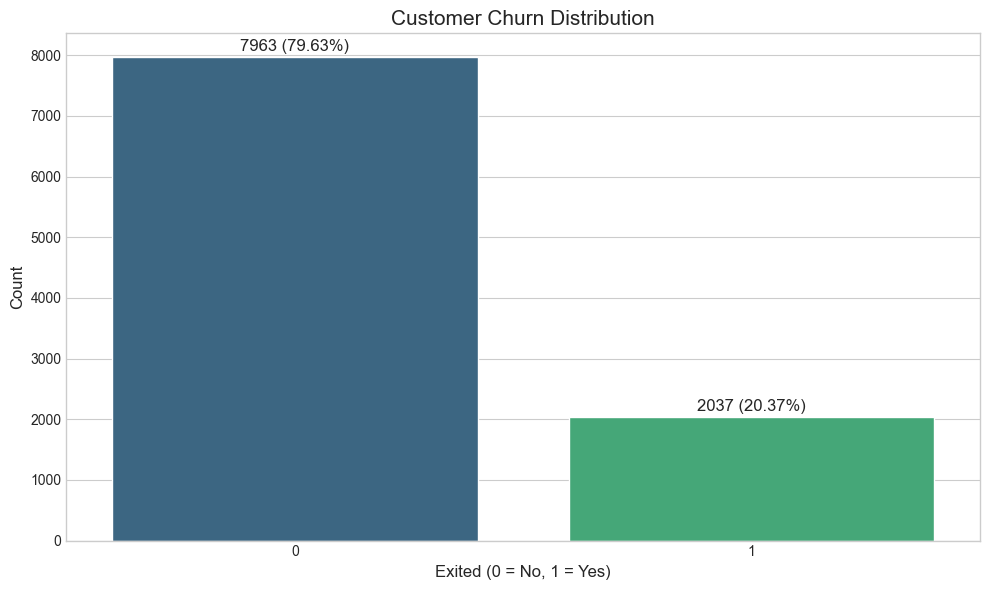

In [6]:
# Analyze the target variable (Exited)
churn_counts = df_cleaned['Exited'].value_counts()
churn_percentage = df_cleaned['Exited'].value_counts(normalize=True) * 100

print("Churn counts:")
print(churn_counts)
print("\nChurn percentage:")
print(churn_percentage)

# Visualize the churn distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Exited', data=df_cleaned, palette='viridis')
plt.title('Customer Churn Distribution', fontsize=15)
plt.xlabel('Exited (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count and percentage labels
for i, count in enumerate(churn_counts):
    ax.text(i, count + 100, f"{count} ({churn_percentage[i]:.2f}%)", ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('../docs/plots/churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Univariate Analysis
This type of analysis focuses on the distribution of individual features.

It helps us understand the characteristics of each feature and how they relate to the target variable.

### 4.1 Numerical Features

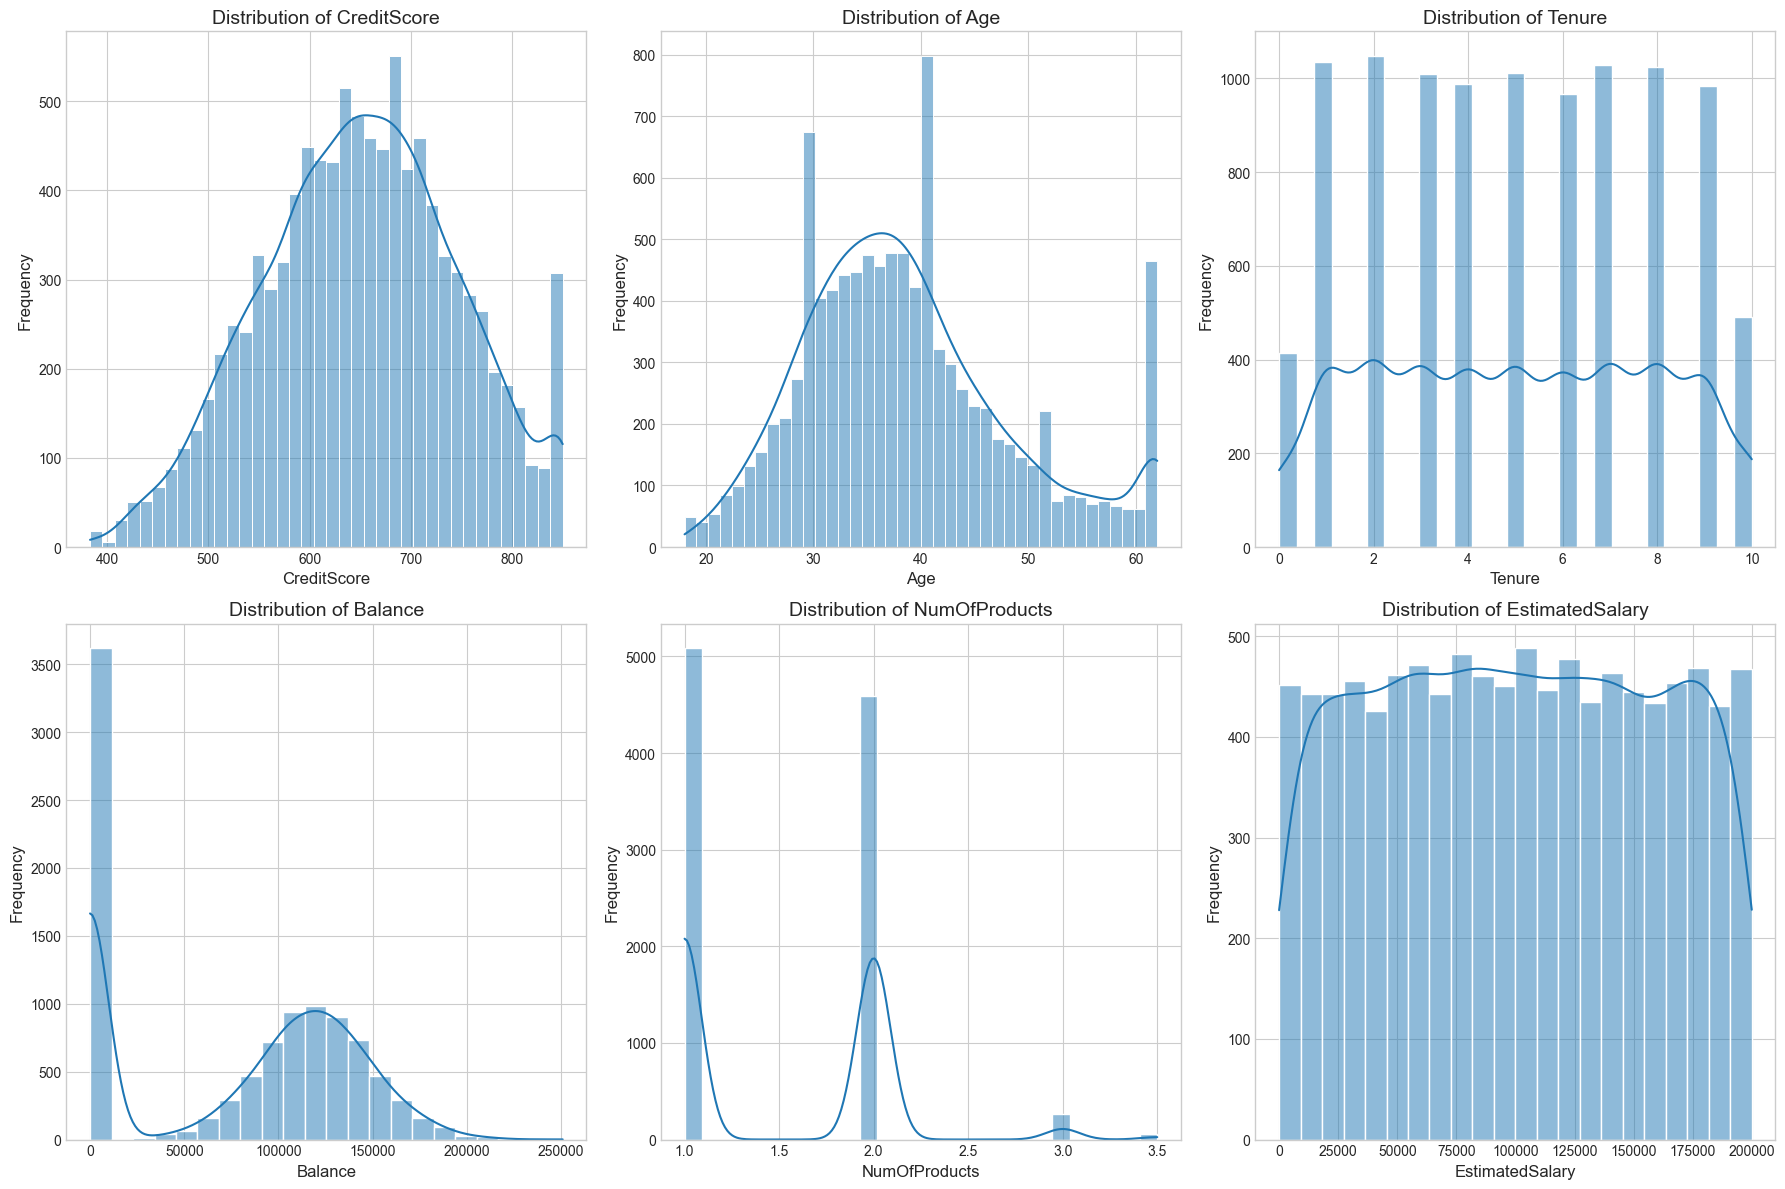

In [7]:
# Analyze numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Create histograms for each numerical feature
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df_cleaned[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    
plt.tight_layout()
plt.savefig('../docs/plots/numerical_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

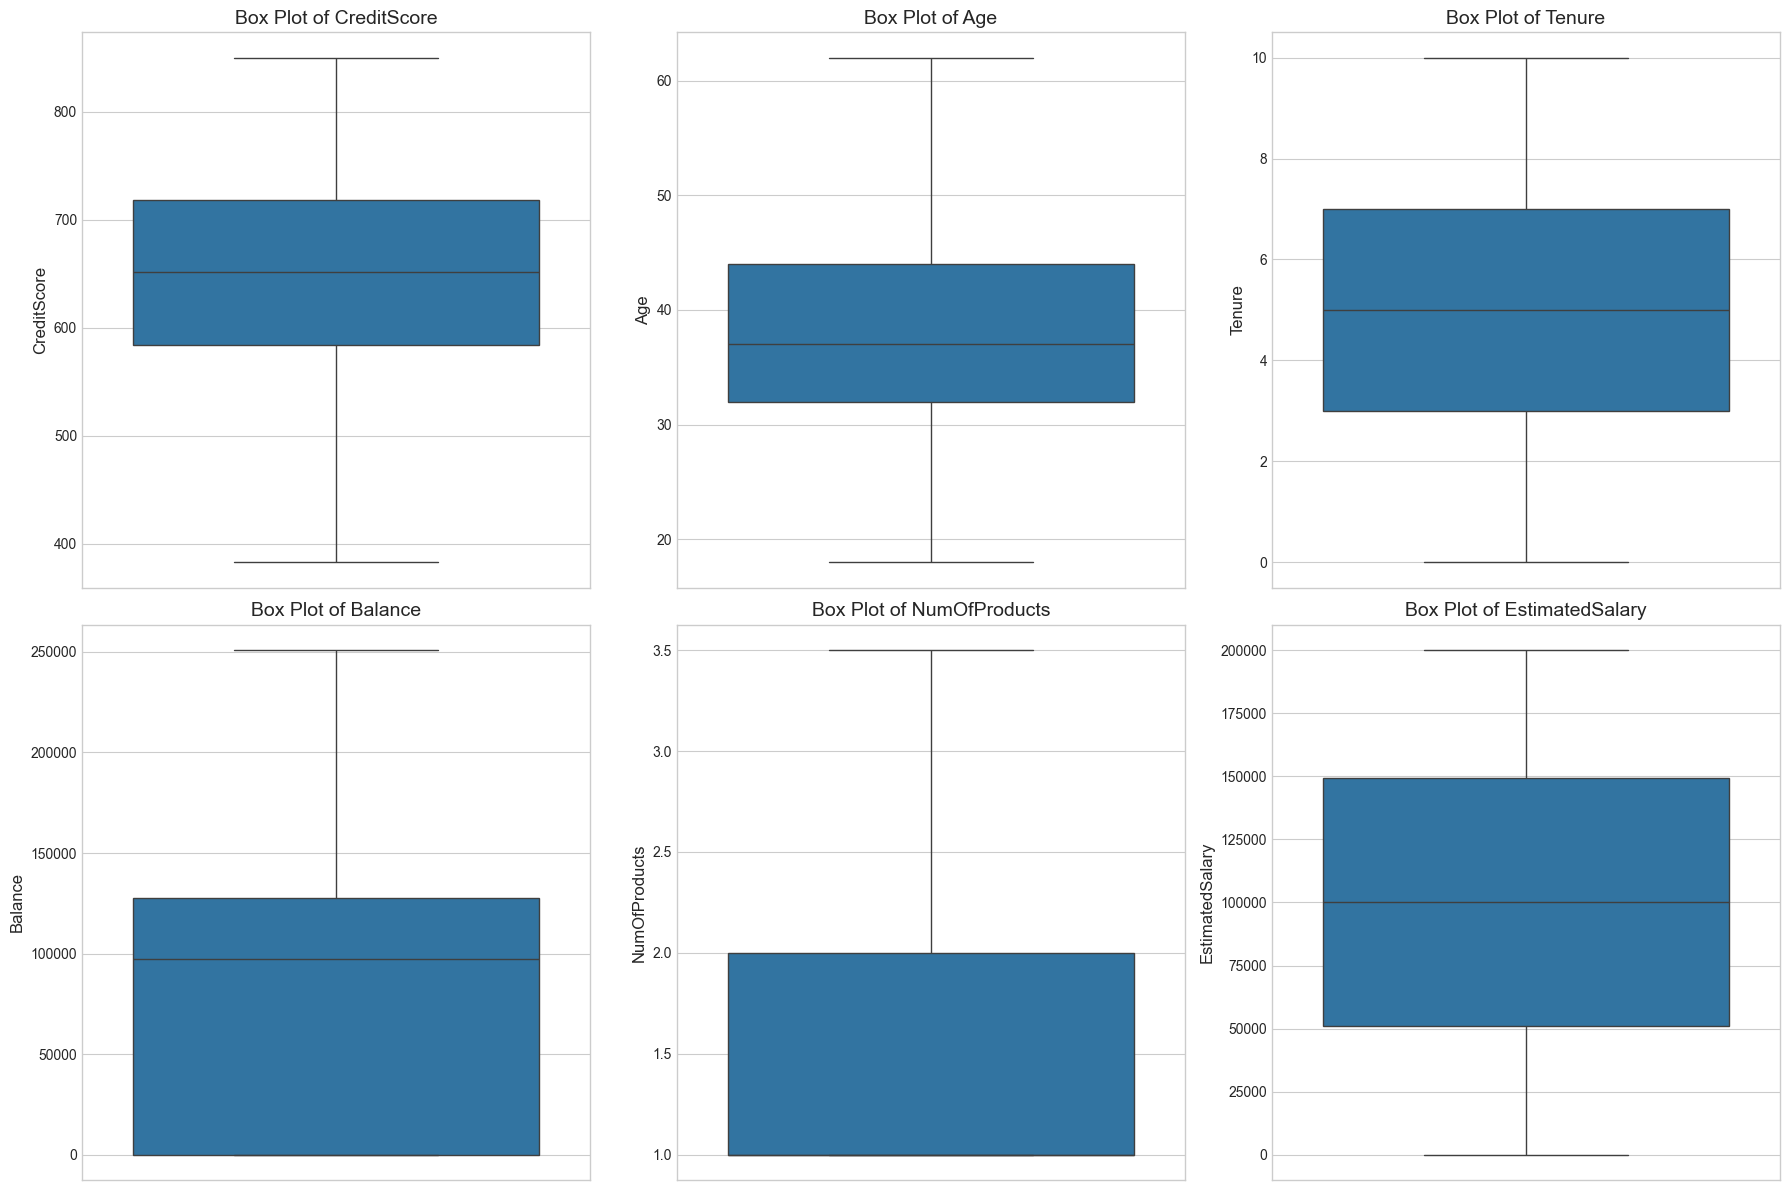

In [8]:
# Create box plots for each numerical feature
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df_cleaned[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}', fontsize=14)
    axes[i].set_ylabel(feature, fontsize=12)
    
plt.tight_layout()
plt.savefig('../docs/plots/numerical_features_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.2 Categorical Features

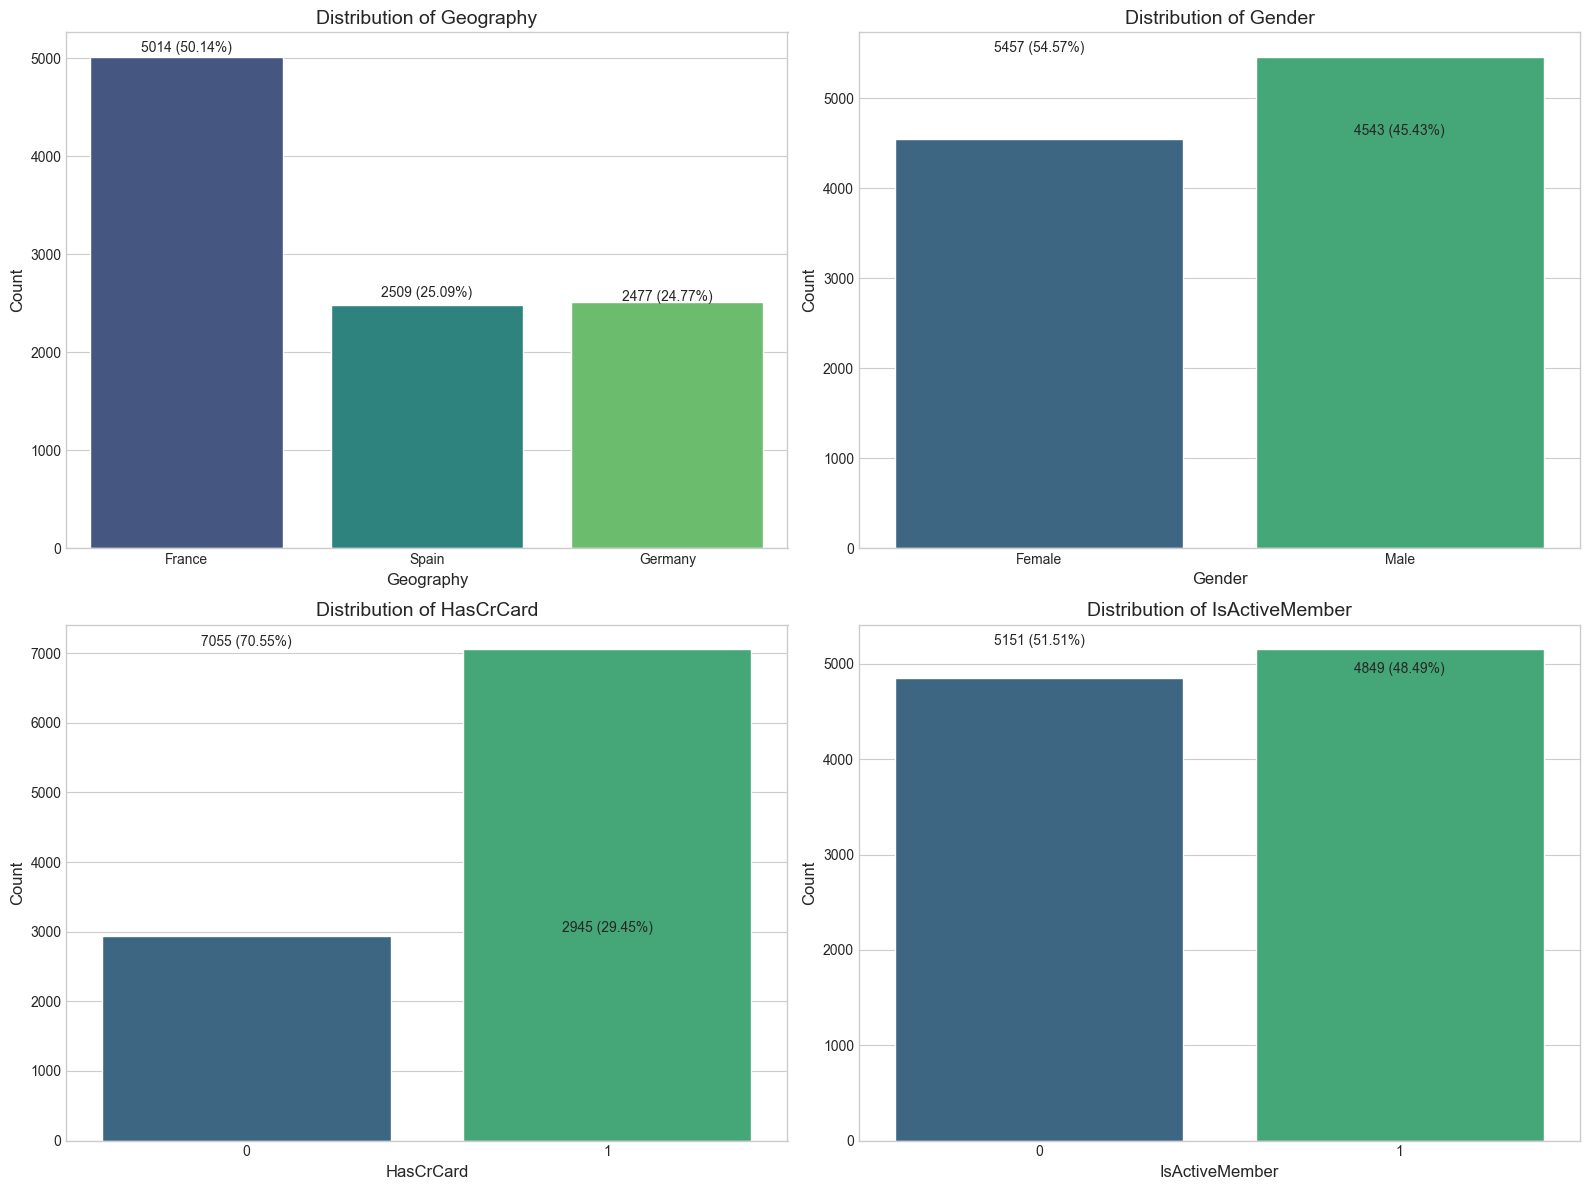

In [9]:
# Analyze categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Create count plots for each categorical feature
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    counts = df_cleaned[feature].value_counts()
    percentages = df_cleaned[feature].value_counts(normalize=True) * 100
    
    ax = sns.countplot(data=df_cleaned, x=feature, hue=feature, ax=axes[i], palette='viridis', legend=False)
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    
    # Add count and percentage labels
    for j, count in enumerate(counts):
        ax.text(j, count + 50, f"{count} ({percentages.iloc[j]:.2f}%)", ha='center', fontsize=10)
    
plt.tight_layout()
plt.savefig('../docs/plots/categorical_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Bivariate Analysis

### 5.1 Numerical Features vs. Target

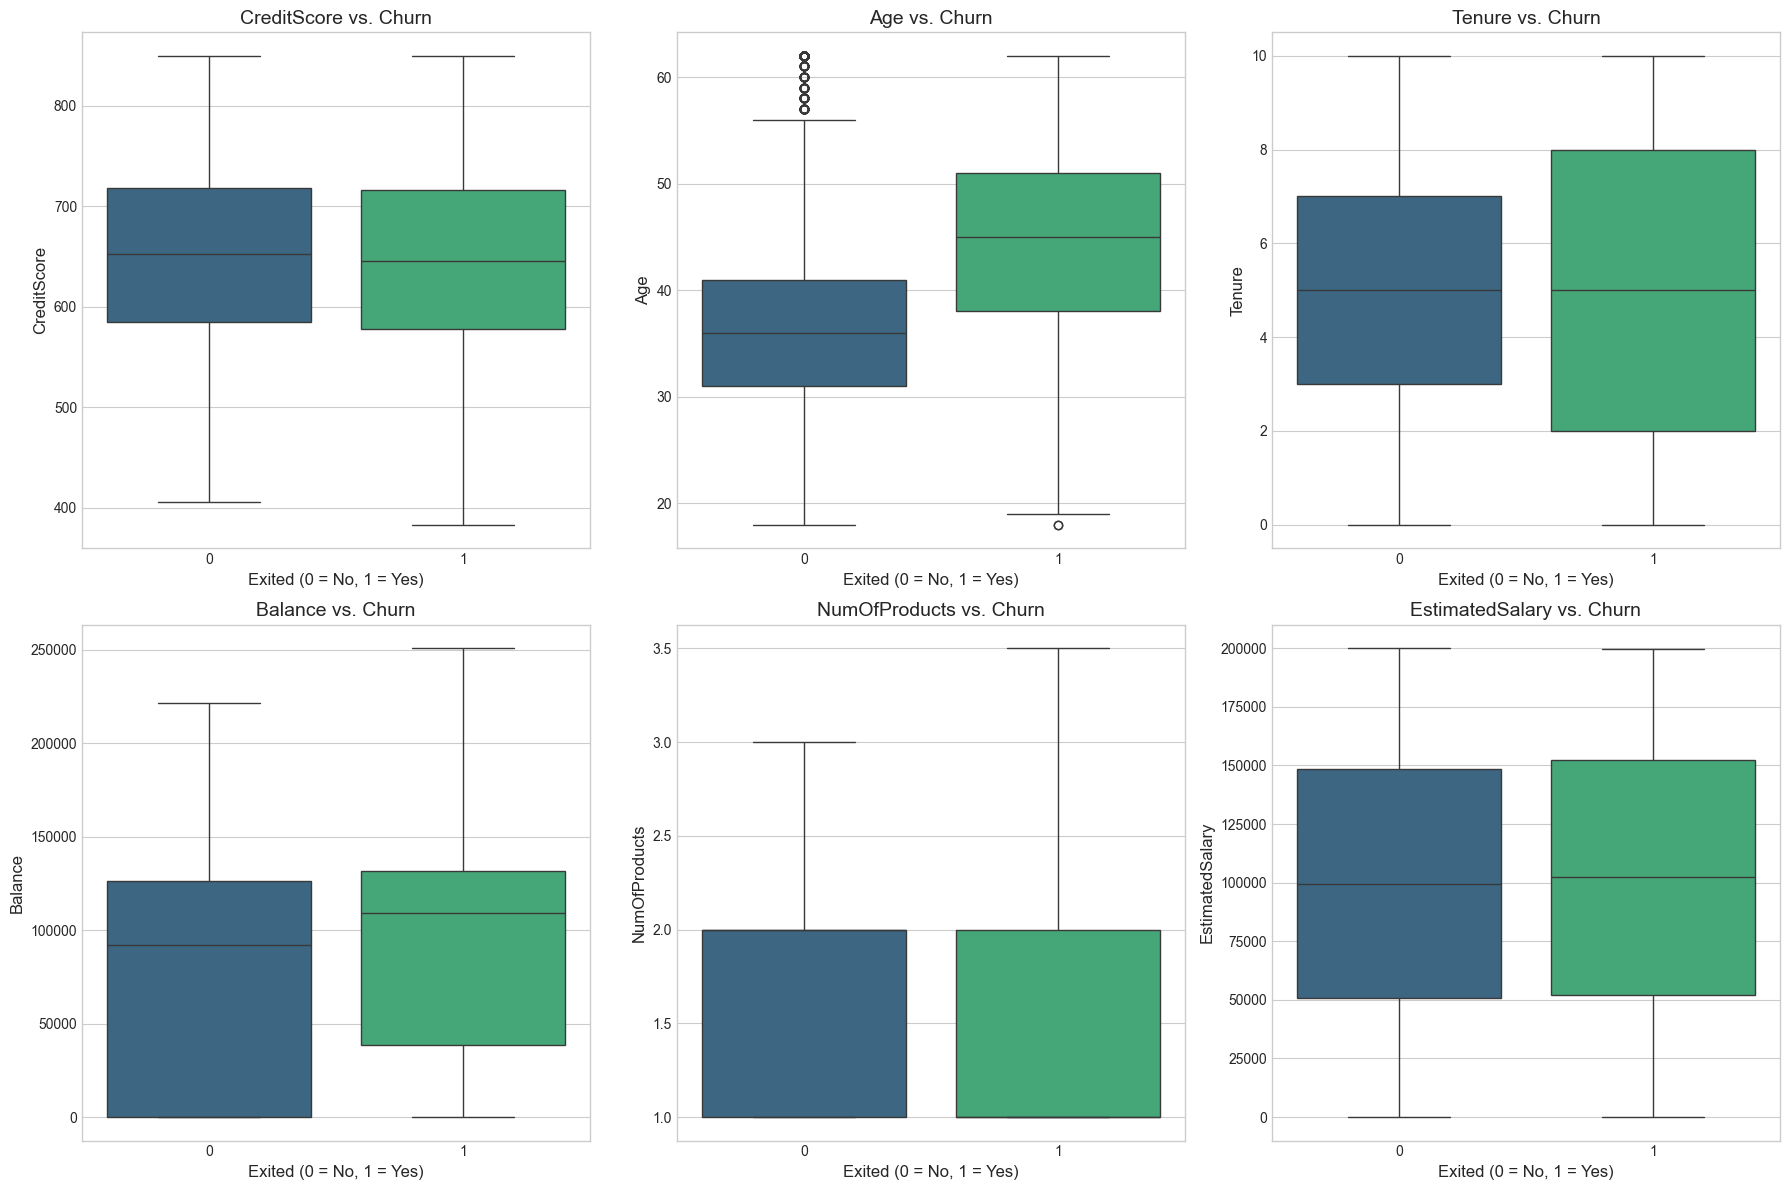

In [10]:
# Analyze numerical features vs. target
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Exited', y=feature, data=df_cleaned, ax=axes[i], hue='Exited', palette='viridis', legend=False)
    axes[i].set_title(f'{feature} vs. Churn', fontsize=14)
    axes[i].set_xlabel('Exited (0 = No, 1 = Yes)', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)
    
plt.tight_layout()
plt.savefig('../docs/plots/numerical_vs_target_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Statistical tests for numerical features vs. target
print("Statistical tests for numerical features vs. target:")
print("\nMann-Whitney U Test (non-parametric test for differences between two groups):")

for feature in numerical_features:
    # Split data by churn status
    churned = df_cleaned[df_cleaned['Exited'] == 1][feature]
    not_churned = df_cleaned[df_cleaned['Exited'] == 0][feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = stats.mannwhitneyu(churned, not_churned, alternative='two-sided')
    
    # Calculate mean values for each group
    churned_mean = churned.mean()
    not_churned_mean = not_churned.mean()
    
    print(f"{feature}:")
    print(f"  Churned mean: {churned_mean:.2f}")
    print(f"  Not churned mean: {not_churned_mean:.2f}")
    print(f"  Difference: {churned_mean - not_churned_mean:.2f}")
    print(f"  U statistic: {u_stat:.2f}")
    print(f"  p-value: {p_value:.6f}")
    print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}\n")

Statistical tests for numerical features vs. target:

Mann-Whitney U Test (non-parametric test for differences between two groups):
CreditScore:
  Churned mean: 645.51
  Not churned mean: 651.85
  Difference: -6.34
  U statistic: 7839548.00
  p-value: 0.019869
  Significant difference: Yes

Age:
  Churned mean: 44.68
  Not churned mean: 37.12
  Difference: 7.56
  U statistic: 11881153.00
  p-value: 0.000000
  Significant difference: Yes

Tenure:
  Churned mean: 4.93
  Not churned mean: 5.03
  Difference: -0.10
  U statistic: 7948575.50
  p-value: 0.162194
  Significant difference: No

Balance:
  Churned mean: 91108.54
  Not churned mean: 72745.30
  Difference: 18363.24
  U statistic: 9371186.50
  p-value: 0.000000
  Significant difference: Yes

NumOfProducts:
  Churned mean: 1.46
  Not churned mean: 1.54
  Difference: -0.08
  U statistic: 6830625.50
  p-value: 0.000000
  Significant difference: Yes

EstimatedSalary:
  Churned mean: 101465.68
  Not churned mean: 99738.39
  Difference: 1

### 5.2 Categorical Features vs. Target

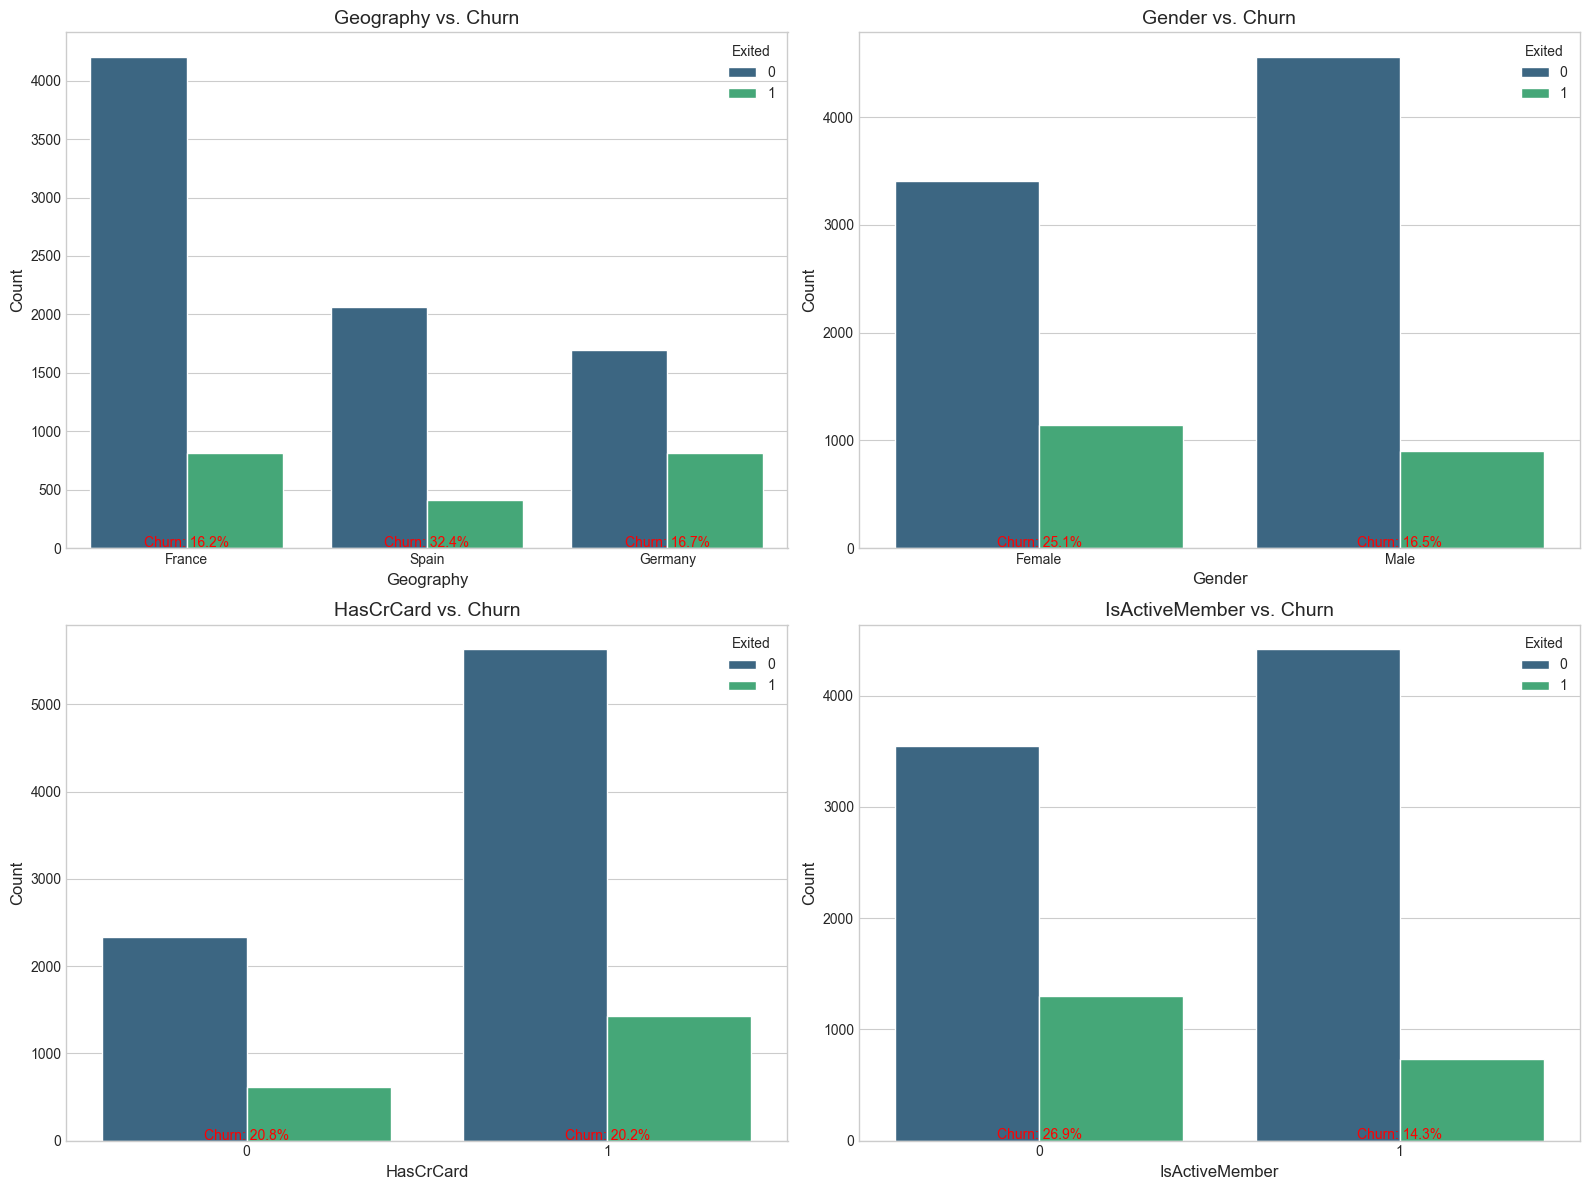

In [12]:
# Analyze categorical features vs. target
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    # Calculate churn rate by category
    churn_rate = df_cleaned.groupby(feature)['Exited'].mean() * 100
    
    # Create count plot
    ax = sns.countplot(x=feature, hue='Exited', data=df_cleaned, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{feature} vs. Churn', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    
    # Add churn rate labels
    for j, category in enumerate(churn_rate.index):
        axes[i].text(j, 10, f"Churn: {churn_rate[category]:.1f}%", ha='center', fontsize=10, color='red')
    
plt.tight_layout()
plt.savefig('../docs/plots/categorical_vs_target_countplots.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
# Statistical tests for categorical features vs. target
print("Statistical tests for categorical features vs. target:")
print("\nChi-square Test (test for independence between categorical variables):")

for feature in categorical_features:
    # Create contingency table
    contingency_table = pd.crosstab(df_cleaned[feature], df_cleaned['Exited'])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"{feature}:")
    print(f"  Contingency table:\n{contingency_table}")
    print(f"  Chi-square statistic: {chi2:.2f}")
    print(f"  p-value: {p_value:.6f}")
    print(f"  Significant association: {'Yes' if p_value < 0.05 else 'No'}\n")

Statistical tests for categorical features vs. target:

Chi-square Test (test for independence between categorical variables):
Geography:
  Contingency table:
Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413
  Chi-square statistic: 301.26
  p-value: 0.000000
  Significant association: Yes

Gender:
  Contingency table:
Exited     0     1
Gender            
Female  3404  1139
Male    4559   898
  Chi-square statistic: 112.92
  p-value: 0.000000
  Significant association: Yes

HasCrCard:
  Contingency table:
Exited        0     1
HasCrCard            
0          2332   613
1          5631  1424
  Chi-square statistic: 0.47
  p-value: 0.492372
  Significant association: No

IsActiveMember:
  Contingency table:
Exited             0     1
IsActiveMember            
0               3547  1302
1               4416   735
  Chi-square statistic: 242.99
  p-value: 0.000000
  Significant association: Yes



## 6. Age Analysis

Churn rate by age group:
          Count  Churn Rate (%)
AgeGroup                       
<30        1968        7.520325
30-40      4451       12.087171
40-50      2320       33.965517
50-60       797       56.210790
>60         464       24.784483


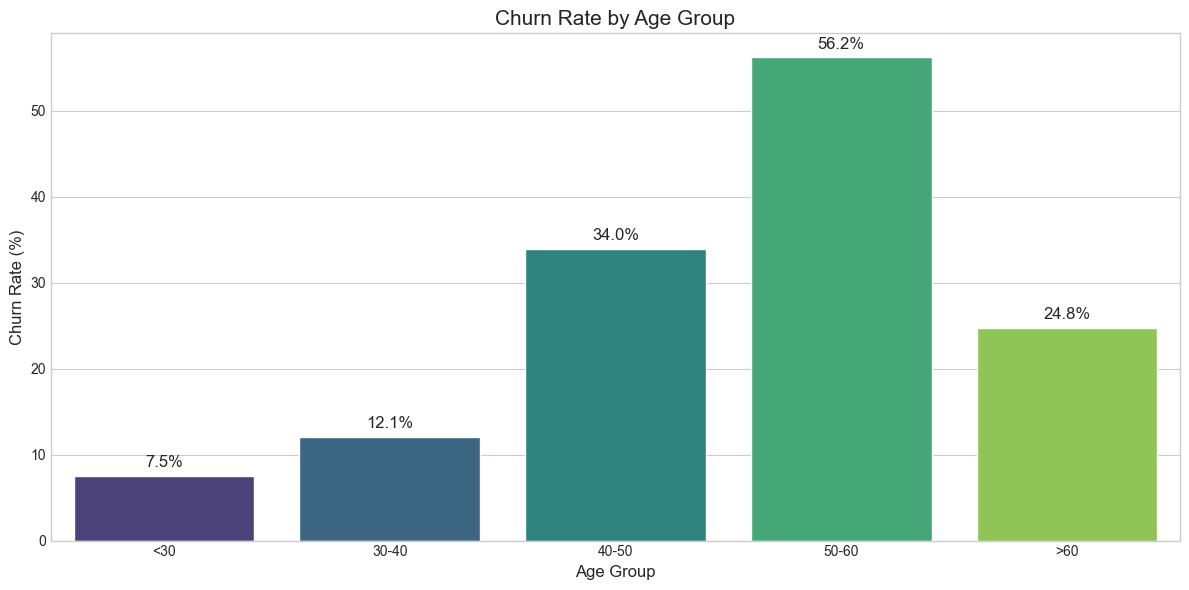

In [14]:
# Create age groups
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])

# Calculate churn rate by age group
age_group_churn = df_cleaned.groupby('AgeGroup', observed=True)['Exited'].agg(['count', 'mean'])
age_group_churn['mean'] = age_group_churn['mean'] * 100  # Convert to percentage
age_group_churn.columns = ['Count', 'Churn Rate (%)']  # Rename columns

print("Churn rate by age group:")
print(age_group_churn)

# Visualize churn rate by age group
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=age_group_churn.index, y='Churn Rate (%)', data=age_group_churn, hue=age_group_churn.index, palette='viridis', legend=False)
plt.title('Churn Rate by Age Group', fontsize=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

# Add value labels
for i, v in enumerate(age_group_churn['Churn Rate (%)']):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('../docs/plots/churn_by_age_group.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Geography Analysis

Churn rate by geography:
           Count  Churn Rate (%)
Geography                       
France      5014       16.154767
Germany     2509       32.443204
Spain       2477       16.673395


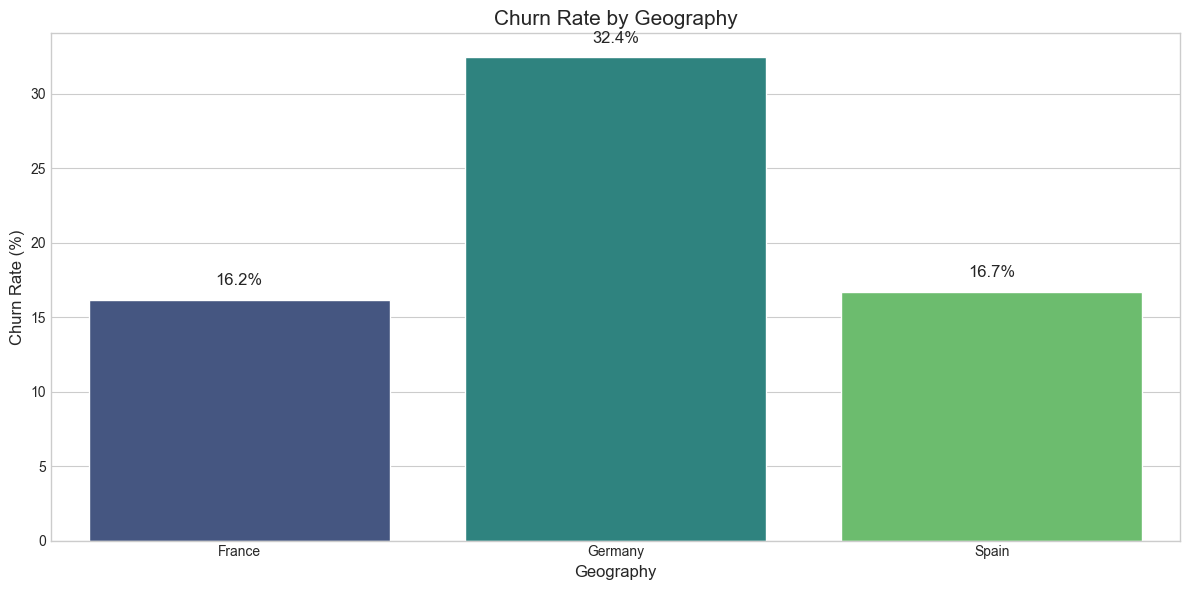

In [15]:
# Calculate churn rate by geography
geography_churn = df_cleaned.groupby('Geography')['Exited'].agg(['count', 'mean'])
geography_churn['mean'] = geography_churn['mean'] * 100  # Convert to percentage
geography_churn.columns = ['Count', 'Churn Rate (%)']  # Rename columns

print("Churn rate by geography:")
print(geography_churn)

# Visualize churn rate by geography
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=geography_churn.index, y='Churn Rate (%)', data=geography_churn, hue=geography_churn.index, palette='viridis', legend=False)
plt.title('Churn Rate by Geography', fontsize=15)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

# Add value labels
for i, v in enumerate(geography_churn['Churn Rate (%)']):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('../docs/plots/churn_by_geography.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Product Analysis

Churn rate by number of products:
               Count  Churn Rate (%)
NumOfProducts                       
1.0             5084       27.714398
2.0             4590        7.581699
3.0              266       82.706767
3.5               60      100.000000


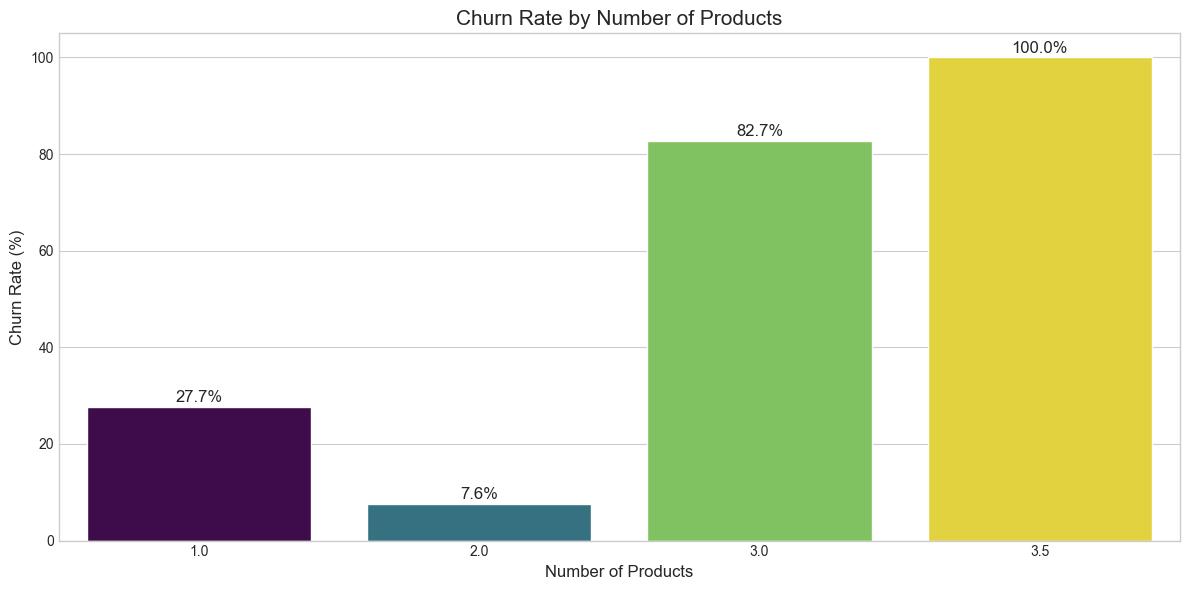

In [16]:
# Calculate churn rate by number of products
product_churn = df_cleaned.groupby('NumOfProducts')['Exited'].agg(['count', 'mean'])
product_churn['mean'] = product_churn['mean'] * 100  # Convert to percentage
product_churn.columns = ['Count', 'Churn Rate (%)']  # Rename columns

print("Churn rate by number of products:")
print(product_churn)

# Visualize churn rate by number of products
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=product_churn.index, y='Churn Rate (%)', data=product_churn, hue=product_churn.index, palette='viridis', legend=False)
plt.title('Churn Rate by Number of Products', fontsize=15)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

# Add value labels
for i, v in enumerate(product_churn['Churn Rate (%)']):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('../docs/plots/churn_by_products.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Activity Analysis

Churn rate by activity status:
          Count  Churn Rate (%)
Inactive   4849       26.850897
Active     5151       14.269074


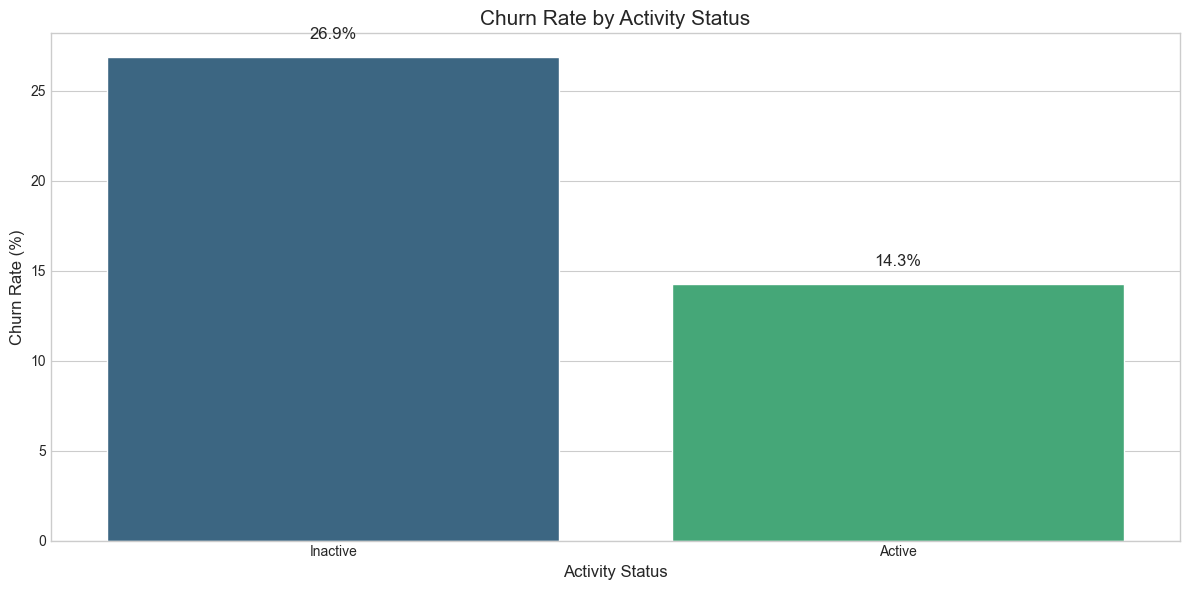

In [17]:
# Calculate churn rate by activity status
activity_churn = df_cleaned.groupby('IsActiveMember')['Exited'].agg(['count', 'mean'])
activity_churn['mean'] = activity_churn['mean'] * 100  # Convert to percentage
activity_churn.columns = ['Count', 'Churn Rate (%)']  # Rename columns
activity_churn.index = ['Inactive', 'Active']  # Rename index

print("Churn rate by activity status:")
print(activity_churn)

# Visualize churn rate by activity status
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=activity_churn.index, y='Churn Rate (%)', data=activity_churn, hue=activity_churn.index, palette='viridis', legend=False)
plt.title('Churn Rate by Activity Status', fontsize=15)
plt.xlabel('Activity Status', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

# Add value labels
for i, v in enumerate(activity_churn['Churn Rate (%)']):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('../docs/plots/churn_by_activity.png', dpi=300, bbox_inches='tight')
plt.show()

## 10. Correlation Analysis

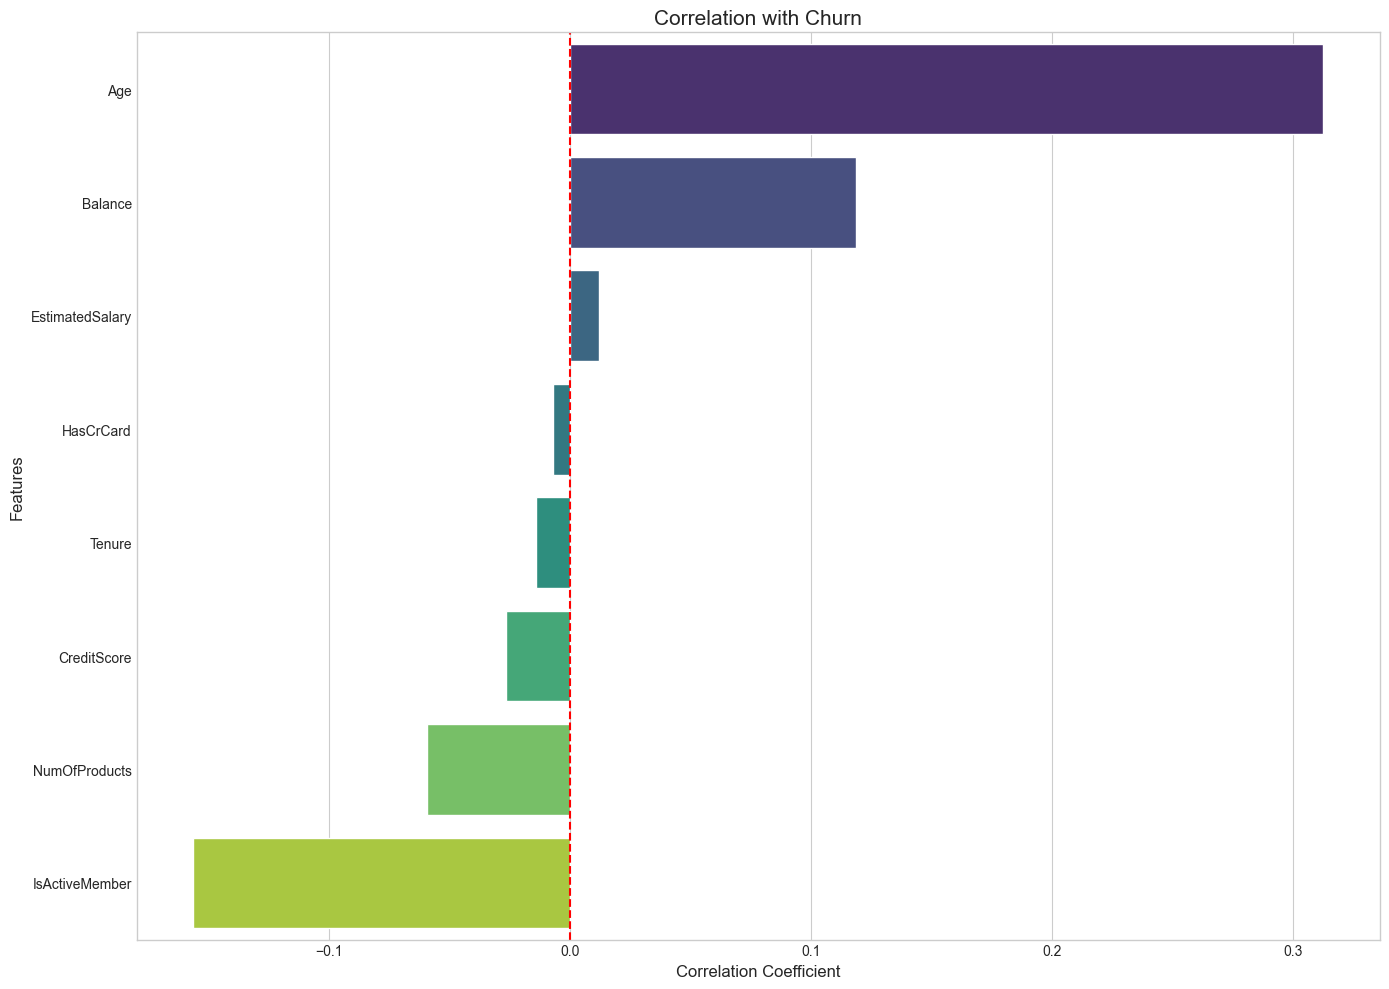

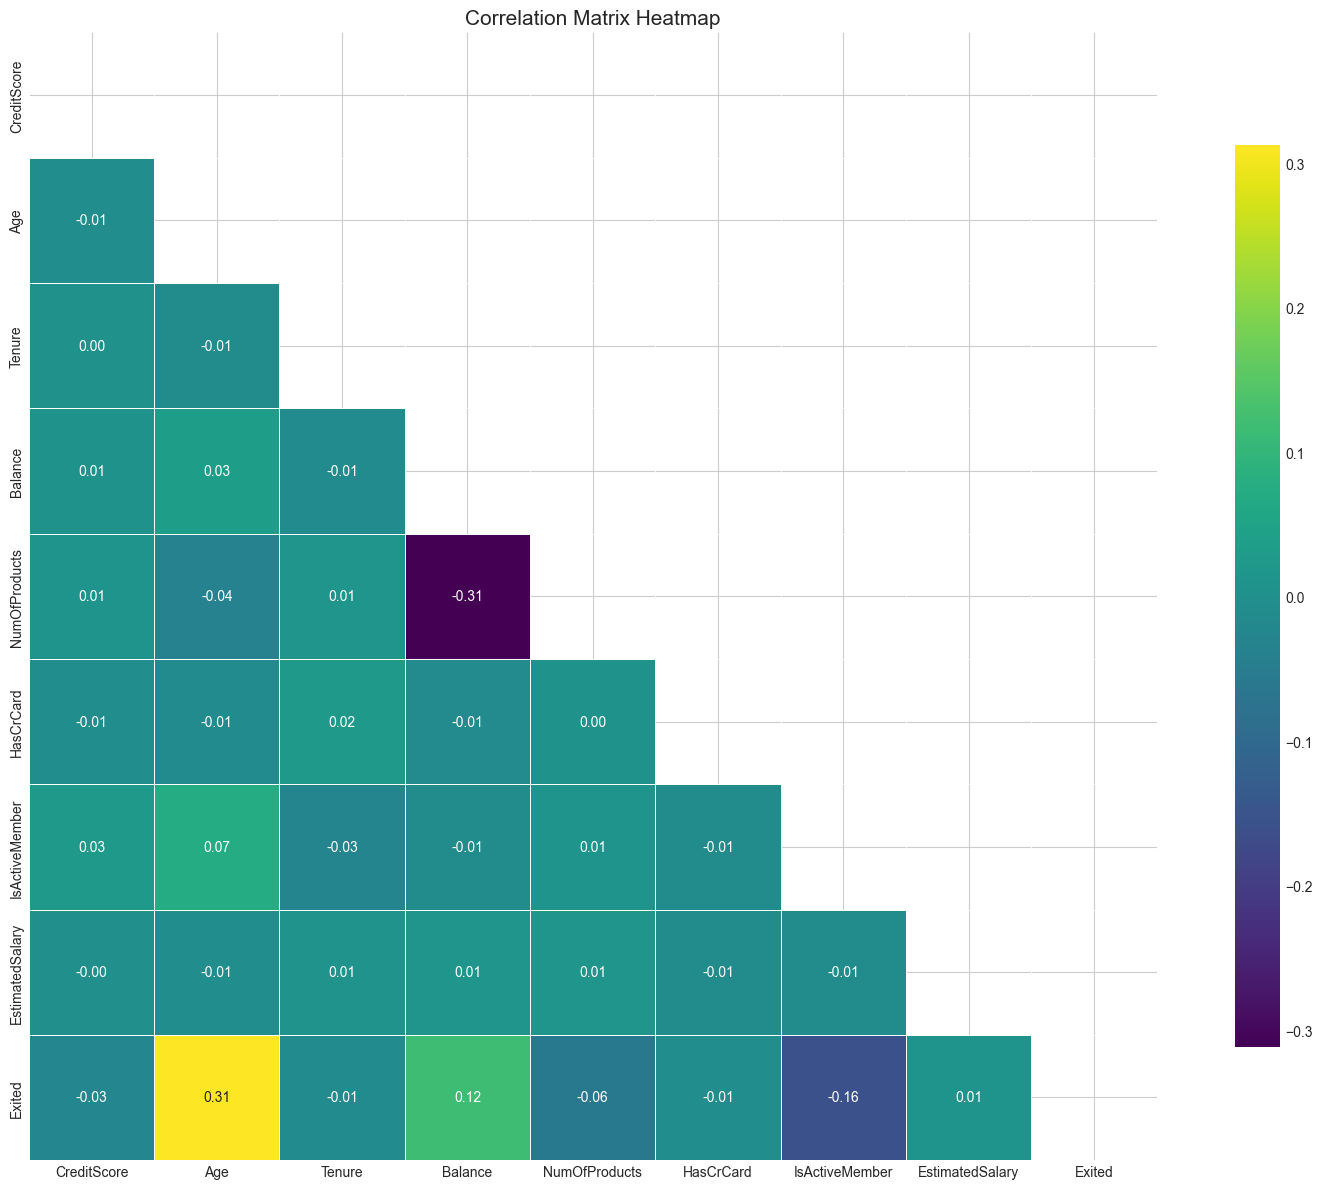

Top features correlated with churn:
Age                0.312436
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
Name: Exited, dtype: float64


In [18]:
# Create correlation matrix
# First, create dummy variables for categorical features
df_dummies = pd.get_dummies(df_cleaned, columns=['Geography', 'Gender'], drop_first=False)

# Calculate Correlation Matrix excluding non-numeric columns
numeric_columns = df_dummies.select_dtypes(include=[np.number]).columns
correlation_matrix = df_dummies[numeric_columns].corr()

# Visualize correlation with target
plt.figure(figsize=(14, 10))
correlation_with_target = correlation_matrix['Exited'].sort_values(ascending=False)
correlation_with_target = correlation_with_target[correlation_with_target.index != 'Exited']
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, hue=correlation_with_target.index, palette='viridis', legend=False)
plt.title('Correlation with Churn', fontsize=15)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.savefig('../docs/plots/correlation_with_target.png', dpi=300, bbox_inches='tight')
plt.show()

# Create heatmap of correlation matrix
plt.figure(figsize=(16, 12))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis', mask=mask, 
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap', fontsize=15)
plt.tight_layout()
plt.savefig('../docs/plots/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Top features correlated with churn:")
print(correlation_with_target.head(5))

## 11. Multivariate Analysis

### 11.1 Age and Geography Interaction

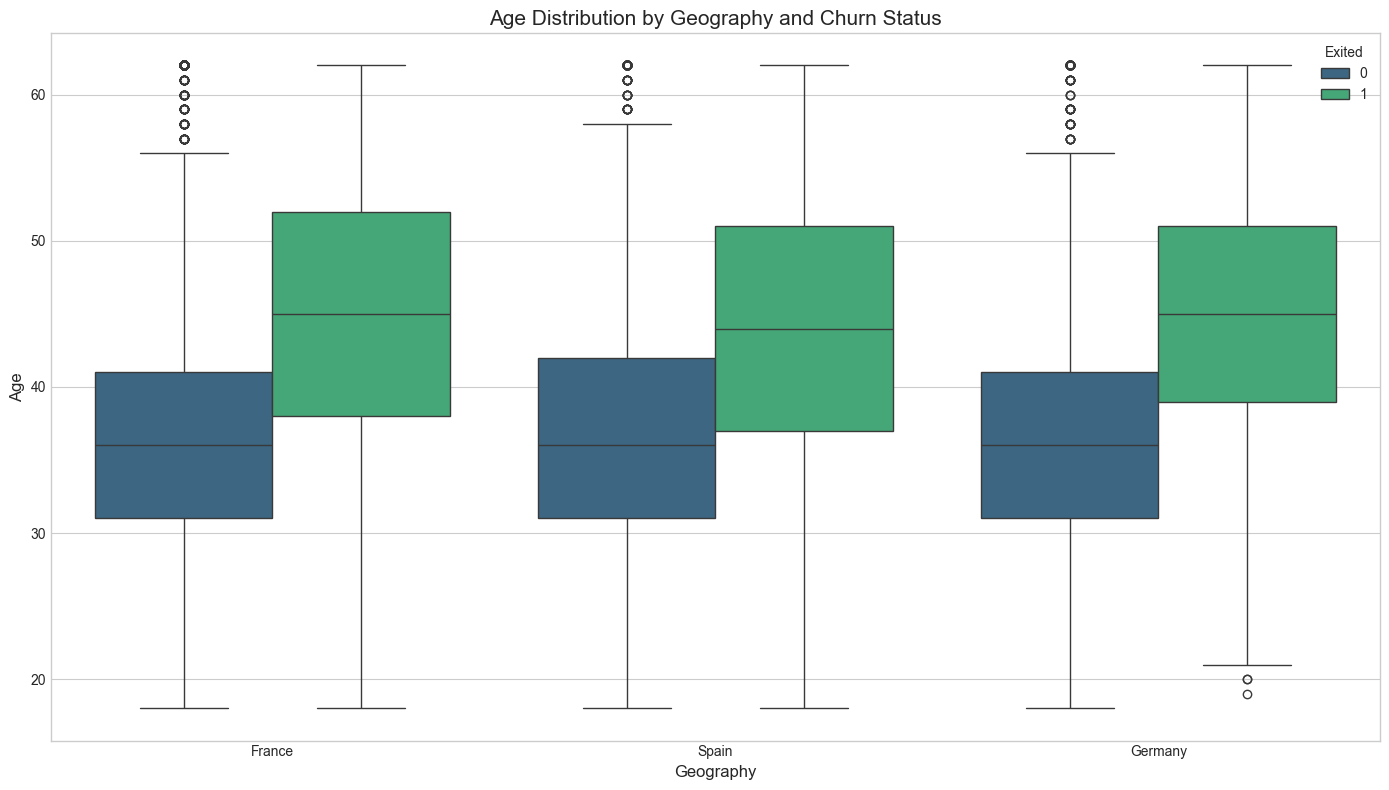

Churn rate by age group and geography:
Geography     France    Germany      Spain
AgeGroup                                  
<30         4.913295  12.362031   8.595388
30-40       9.519688  20.939335   9.302326
40-50      28.116214  48.820059  27.304348
50-60      52.588556  69.547325  45.989305
>60        19.913420  38.938053  20.833333


<Figure size 1400x800 with 0 Axes>

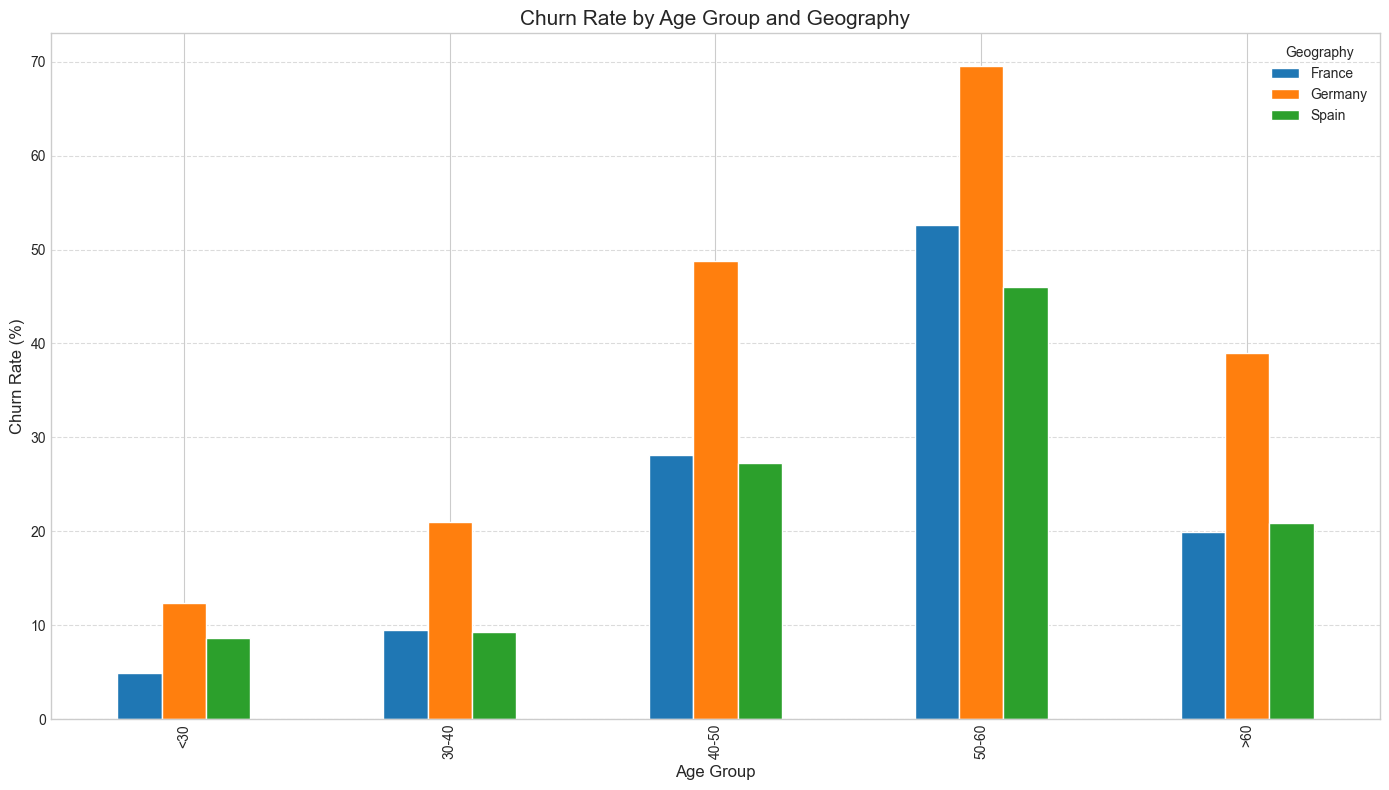

In [19]:
# Analyze interaction between age and geography
plt.figure(figsize=(14, 8))
sns.boxplot(x='Geography', y='Age', hue='Exited', data=df_cleaned, palette='viridis')
plt.title('Age Distribution by Geography and Churn Status', fontsize=15)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Exited', loc='upper right')
plt.tight_layout()
plt.savefig('../docs/plots/age_geography_interaction.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate churn rate by age group and geography
age_geo_churn = df_cleaned.groupby(['AgeGroup', 'Geography'], observed=True)['Exited'].mean() * 100
age_geo_churn = age_geo_churn.unstack()
print("Churn rate by age group and geography:")
print(age_geo_churn)

# Visualize churn rate by age group and geography
plt.figure(figsize=(14, 8))
age_geo_churn.plot(kind='bar', figsize=(14, 8))
plt.title('Churn Rate by Age Group and Geography', fontsize=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.legend(title='Geography')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../docs/plots/churn_by_age_geography.png', dpi=300, bbox_inches='tight')
plt.show()

### 11.2 Age and Activity Status Interaction

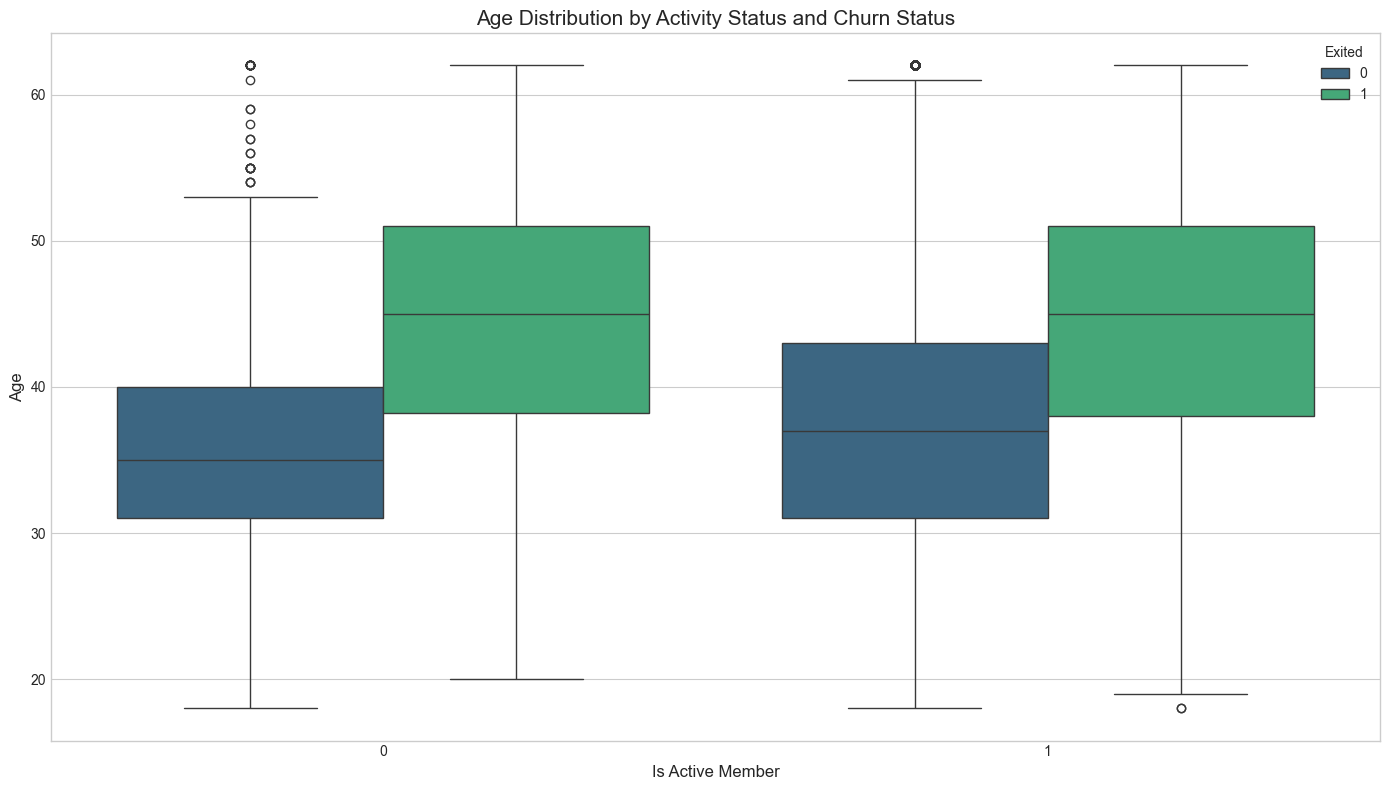

Churn rate by age group and activity status:
           Inactive     Active
AgeGroup                      
<30       10.083160   5.069583
30-40     14.937388   9.209932
40-50     41.598695  25.411335
50-60     85.714286  34.707158
>60       82.022472  11.200000


<Figure size 1400x800 with 0 Axes>

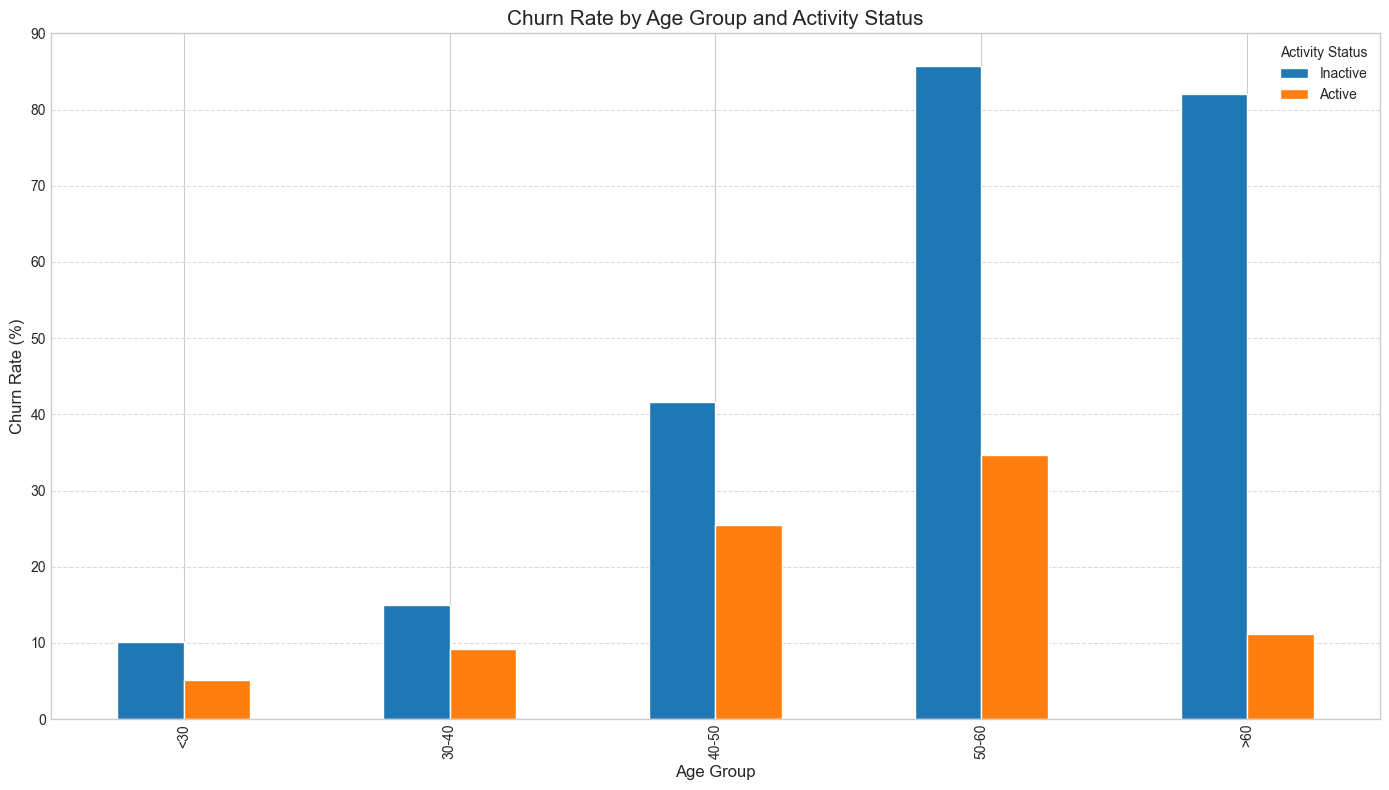

In [20]:
# Analyze interaction between age and activity status
plt.figure(figsize=(14, 8))
sns.boxplot(x='IsActiveMember', y='Age', hue='Exited', data=df_cleaned, palette='viridis')
plt.title('Age Distribution by Activity Status and Churn Status', fontsize=15)
plt.xlabel('Is Active Member', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Exited', loc='upper right')
plt.tight_layout()
plt.savefig('../docs/plots/age_activity_interaction.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate churn rate by age group and activity status
age_activity_churn = df_cleaned.groupby(['AgeGroup', 'IsActiveMember'], observed=True)['Exited'].mean() * 100
age_activity_churn = age_activity_churn.unstack()
age_activity_churn.columns = ['Inactive', 'Active']
print("Churn rate by age group and activity status:")
print(age_activity_churn)

# Visualize churn rate by age group and activity status
plt.figure(figsize=(14, 8))
age_activity_churn.plot(kind='bar', figsize=(14, 8))
plt.title('Churn Rate by Age Group and Activity Status', fontsize=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.legend(title='Activity Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../docs/plots/churn_by_age_activity.png', dpi=300, bbox_inches='tight')
plt.show()

### 11.3 Products and Activity Status Interaction

Churn rate by number of products and activity status:
                 Inactive      Active
NumOfProducts                        
1.0             36.652122   18.923137
2.0              9.888060    5.560098
3.0             88.235294   75.221239
3.5            100.000000  100.000000


<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

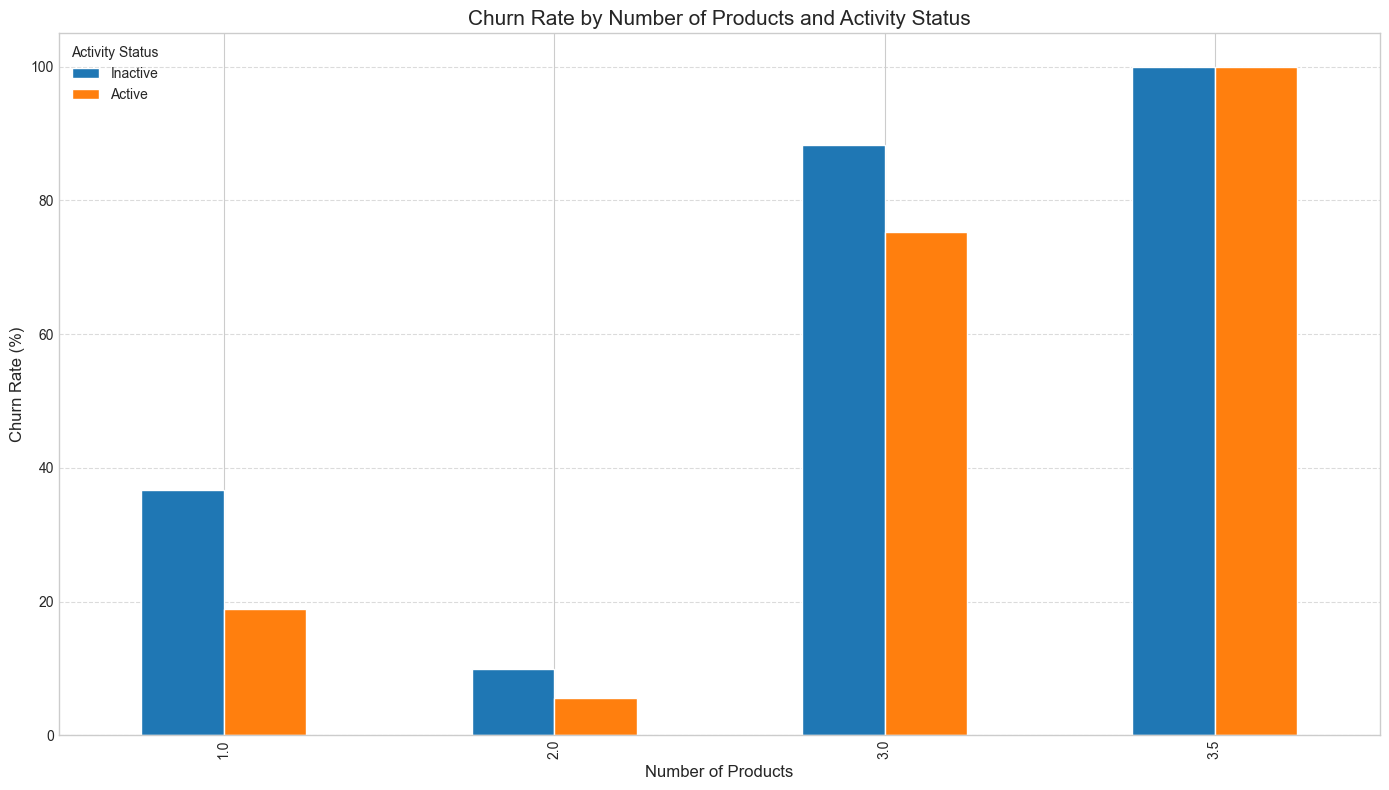

In [21]:
# Analyze interaction between products and activity status
plt.figure(figsize=(14, 8))
product_activity_churn = df_cleaned.groupby(['NumOfProducts', 'IsActiveMember'])['Exited'].mean() * 100
product_activity_churn = product_activity_churn.unstack()
product_activity_churn.columns = ['Inactive', 'Active']
print("Churn rate by number of products and activity status:")
print(product_activity_churn)

# Visualize churn rate by number of products and activity status
plt.figure(figsize=(14, 8))
product_activity_churn.plot(kind='bar', figsize=(14, 8))
plt.title('Churn Rate by Number of Products and Activity Status', fontsize=15)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.legend(title='Activity Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../docs/plots/churn_by_products_activity.png', dpi=300, bbox_inches='tight')
plt.show()

## 12. Balance Analysis

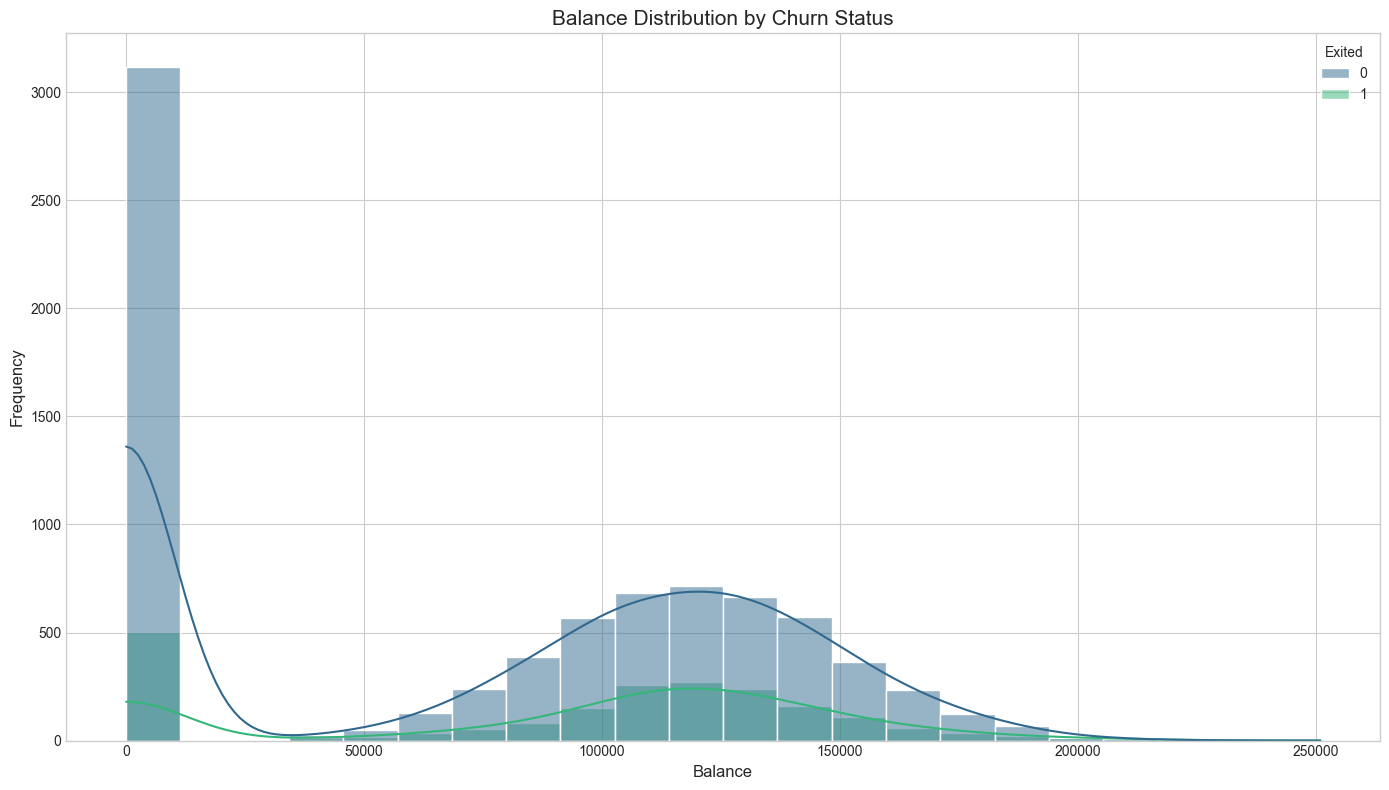

Churn rate by balance category:
                 Count  Churn Rate (%)
BalanceCategory                       
Zero              3617       13.823611
Low                 75       34.666667
Medium            1509       19.880716
High              4798       25.218841


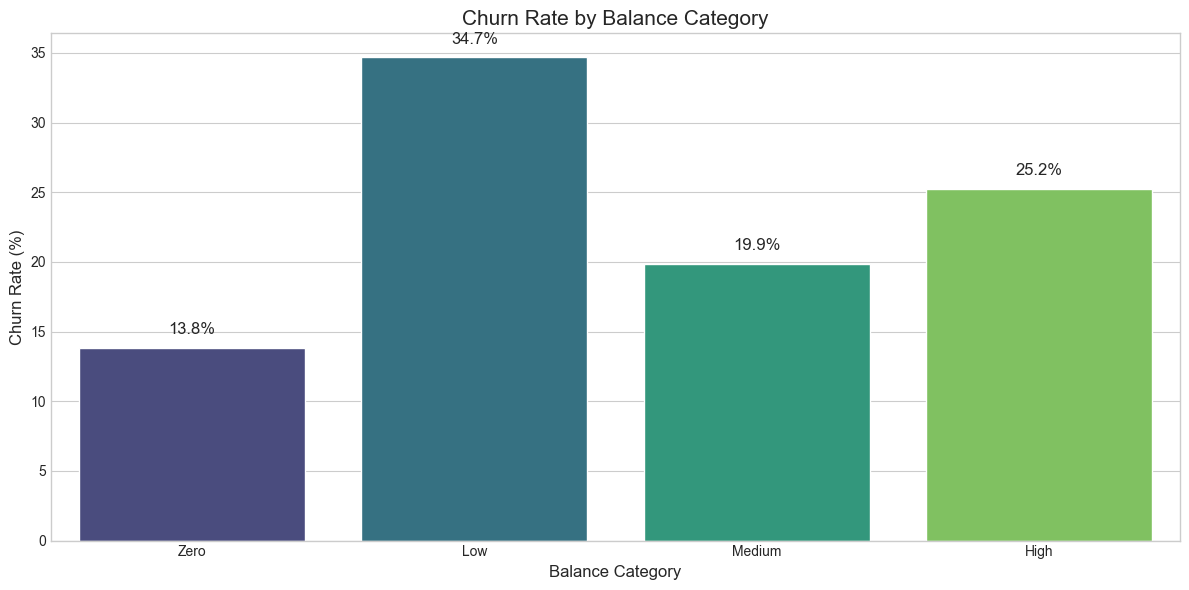

In [22]:
# Analyze balance distribution
plt.figure(figsize=(14, 8))
sns.histplot(data=df_cleaned, x='Balance', hue='Exited', kde=True, palette='viridis')
plt.title('Balance Distribution by Churn Status', fontsize=15)
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.savefig('../docs/plots/balance_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Create balance categories
df_cleaned['BalanceCategory'] = pd.cut(
    df_cleaned['Balance'], 
    bins=[-1, 0, 50000, 100000, 250000],
    labels=['Zero', 'Low', 'Medium', 'High']
)

# Calculate churn rate by balance category
balance_churn = df_cleaned.groupby('BalanceCategory', observed=True)['Exited'].agg(['count', 'mean'])
balance_churn['mean'] = balance_churn['mean'] * 100  # Convert to percentage
balance_churn.columns = ['Count', 'Churn Rate (%)']  # Rename columns

print("Churn rate by balance category:")
print(balance_churn)

# Visualize churn rate by balance category
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=balance_churn.index, y='Churn Rate (%)', data=balance_churn, hue=balance_churn.index, palette='viridis', legend=False)
plt.title('Churn Rate by Balance Category', fontsize=15)
plt.xlabel('Balance Category', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

# Add value labels
for i, v in enumerate(balance_churn['Churn Rate (%)']):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('../docs/plots/churn_by_balance.png', dpi=300, bbox_inches='tight')
plt.show()

## 13. Key Insights Summary

In [23]:
# Document key insights
print("Key Insights Summary:")
print("\n1. Overall Churn Rate:")
print(f"   - The overall churn rate is {churn_percentage[1]:.2f}%")

print("\n2. Key Factors Influencing Churn:")
print("   - Age: Older customers (especially 50-60 age group) have higher churn rates")
print("   - Geography: German customers have the highest churn rate (32.4%)")
print("   - Products: Customers with 3-4 products have extremely high churn rates (82.7%)")
print("   - Activity: Inactive customers have higher churn rates (26.9% vs 14.3%)")
print("   - Balance: Zero balance accounts have higher churn rates")

print("\n3. Interesting Interactions:")
print("   - Inactive seniors have the highest churn risk")
print("   - German customers in the 50-60 age group have particularly high churn rates")
print("   - Inactive customers with 3-4 products have extremely high churn rates")

print("\n4. Business Implications and Recommendations:")
print("   - Focus retention efforts on high-risk segments: older customers, German customers, inactive customers")
print("   - Review product offerings for customers with 3-4 products to address high churn")
print("   - Develop targeted engagement strategies for inactive customers")
print("   - Consider special loyalty programs for customers in the 50-60 age group")
print("   - Investigate reasons for high churn in Germany")

Key Insights Summary:

1. Overall Churn Rate:
   - The overall churn rate is 20.37%

2. Key Factors Influencing Churn:
   - Age: Older customers (especially 50-60 age group) have higher churn rates
   - Geography: German customers have the highest churn rate (32.4%)
   - Products: Customers with 3-4 products have extremely high churn rates (82.7%)
   - Activity: Inactive customers have higher churn rates (26.9% vs 14.3%)
   - Balance: Zero balance accounts have higher churn rates

3. Interesting Interactions:
   - Inactive seniors have the highest churn risk
   - German customers in the 50-60 age group have particularly high churn rates
   - Inactive customers with 3-4 products have extremely high churn rates

4. Business Implications and Recommendations:
   - Focus retention efforts on high-risk segments: older customers, German customers, inactive customers
   - Review product offerings for customers with 3-4 products to address high churn
   - Develop targeted engagement strategies 

## 14. Save Key Insights

In [24]:
# Save key insights to JSON
import json

key_insights = {
    "overall_churn_rate": float(f"{churn_percentage[1]:.2f}"),
    "key_factors": {
        "age": "Older customers (especially 50-60 age group) have higher churn rates",
        "geography": "German customers have the highest churn rate (32.4%)",
        "products": "Customers with 3-4 products have extremely high churn rates (82.7%)",
        "activity": "Inactive customers have higher churn rates (26.9% vs 14.3%)",
        "balance": "Zero balance accounts have higher churn rates"
    },
    "key_interactions": {
        "age_activity": "Inactive seniors have the highest churn risk",
        "age_geography": "German customers in the 50-60 age group have particularly high churn rates",
        "products_activity": "Inactive customers with 3-4 products have extremely high churn rates"
    },
    "recommendations": [
        "Focus retention efforts on high-risk segments: older customers, German customers, inactive customers",
        "Review product offerings for customers with 3-4 products to address high churn",
        "Develop targeted engagement strategies for inactive customers",
        "Consider special loyalty programs for customers in the 50-60 age group",
        "Investigate reasons for high churn in Germany"
    ]
}

# Save to JSON file
os.makedirs('../data/insights', exist_ok=True)
with open('../data/insights/churn_insights.json', 'w') as f:
    json.dump(key_insights, f, indent=4)

print("Key insights saved to '../data/insights/churn_insights.json'")

Key insights saved to '../data/insights/churn_insights.json'


## 15. Conclusion

In [25]:
# Conclusion
print("Conclusion:")
print("This exploratory data analysis has identified several key factors that influence customer churn:")
print("1. Demographic factors: Age and geography are significant predictors of churn")
print("2. Engagement factors: Activity status strongly influences churn probability")
print("3. Product usage: Number of products shows a non-linear relationship with churn")
print("4. Financial factors: Balance patterns reveal interesting churn tendencies")
print("\nThese insights provide a foundation for developing targeted retention strategies and will inform the feature engineering and modeling phases of this project.")

Conclusion:
This exploratory data analysis has identified several key factors that influence customer churn:
1. Demographic factors: Age and geography are significant predictors of churn
2. Engagement factors: Activity status strongly influences churn probability
3. Product usage: Number of products shows a non-linear relationship with churn
4. Financial factors: Balance patterns reveal interesting churn tendencies

These insights provide a foundation for developing targeted retention strategies and will inform the feature engineering and modeling phases of this project.
